# Did Fandango Fix Their Ratings, Again?

In 2015, data journalist Walt Hickey found strong evidence to suggest that Fandango was inflating movie ratings by comparing the rating in the HTML and the rating on the page. After the release of this information, Fandango officials claimed that the inflation was caused by a bug in their system and they promised to fix the bug as soon as possible.

Fandango has since removed the rating in the HTML. We can assume that they have fixed the issue, but confirming would be better. The goal of this project is to find evidence that shows action or inaction from Fandango to correct the ratings system.

In [74]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

score_comparisons = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [75]:
score_comparisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [76]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [77]:
fandango_scores = score_comparisons[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_ratings = movie_ratings[['movie', 'year', 'fandango']]

The fandango_scores dataset contains fandango ratings data from movies that have a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.

This dataset contains ratings data for 214 of the most popular movies (those with a significant number of votes) released in 2016 and 2017.

Neither dataset was randomly sampled, so we cannot find evidence of widespread rating inflation. However, we can use it to determine if there was still inflation on popular movies in 2016-17, compared to the ratings of popular movies in 2015.

Hickey analyzed the ratings of movies that had at least 30 ratings on Fandango. Unfortunately, our second dataset does not contain the number of Fandango ratings for 2016-17 movies. A workaround to check the relevance of our data is to sample 10 movies from our 2016-17 dataset and check Fandango's website to see if they meet the 30 rating count requirement.

In [78]:
fandango_2016 = fandango_ratings[fandango_ratings['year']==2016]
fandango_2017 = fandango_ratings[fandango_ratings['year']==2017]
print('2016 movies:'+str(len(fandango_2016))+', 2017 movies:'+str(len(fandango_2017)))

2016 movies:191, 2017 movies:23


The 2016-17 data contains more than eight times the amount of 2016 movies than 2017 movies. We will avoid analysis on the 2017 data since it is likely that it will not produce an representative sample of movies released that year.

Fandango has replaced their 5 star ratings system with two new metrics ('Tomatometer' & 'Audience Score') from third party review site 'Rotten Tomatoes'. To account for this change, we will look to the review count of the Audience Score on Rotten Tomatoes.  The Audience Score is defined as "The percentage of users who made a verified movie ticket purchase and rated this 3.5 stars or higher."

Rotten Tomatoes displays the count of audience score ratings for each movie at rounded intervals.

In [79]:
print(fandango_2016[['movie', 'year']].sample(n=10, random_state=1))

                               movie  year
36                           Collide  2016
75         Ice Age: Collision Course  2016
125                 Now You See Me 2  2016
171         The Disappointments Room  2016
92          Kubo and the Two Strings  2016
134  Pride and Prejudice and Zombies  2016
40                          Deadpool  2016
115                    Money Monster  2016
204                         War Dogs  2016
111             Miracles from Heaven  2016


In [80]:
data = [
        ['Collide',2500],
        ['Ice Age: Collision Course',25000],
        ['Now You See Me 2',50000],
        ['The Disappointments Room',2500],
        ['Kubo and the Two Strings',25000],
        ['Pride and Prejudice and Zombies',25000],
        ['Deadpool',100000],
        ['Money Monster',10000],
        ['War Dogs',25000],
        ['Miracles from Heaven', 10000]
       ]

movie_sample = pd.DataFrame(data, columns=['Movie','Ratings Count'])
print(movie_sample)

                             Movie  Ratings Count
0                          Collide           2500
1        Ice Age: Collision Course          25000
2                 Now You See Me 2          50000
3         The Disappointments Room           2500
4         Kubo and the Two Strings          25000
5  Pride and Prejudice and Zombies          25000
6                         Deadpool         100000
7                    Money Monster          10000
8                         War Dogs          25000
9             Miracles from Heaven          10000


Of the 10 movies that we sampled from the 2016-17 dataset, all had more than 2,500 ratings. To identify the change in Fandango's ratings from 2015 to 2016, we will isolate the data into two groups by year and plot the ratings side by side.

In [81]:
fandango_2015 = fandango_scores[fandango_scores['FILM'].str.contains('2015')]

In [82]:
import matplotlib.style as style
style.use('fivethirtyeight')
ratings_graph = fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
ratings_graph = fandango_2016['fandango'].plot.kde(label='2016', legend=True)
ratings_graph.legend()
plt.title('Rating Comparison',fontdict={'fontsize':20})
ratings_graph.set_xlabel('Rating')
ratings_graph.set_xticks([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ratings_graph.set_ylabel('Probability')
ratings_graph.set_yticklabels(labels=['0','20','40','60','80','100%'])
ratings_graph.axhline(y=.008,color='black',linewidth=1.3,alpha=1)

# Save figure instead of displaying it inline for memory efficiency
plt.savefig("images/15_16_ratings_comparison.png", dpi=300, bbox_inches='tight')

# Clear the plot to free memory
plt.close()

<div>
<img src="/images/15_16_ratings_comparison.png" width="750" height="500"/>
</div>

The 2015 distribution has a clear negative skew. The 2016 distribution has a only a slight negative skew. Both plots are unimodal with the 2015 mode at 4.5 and the 2016 mode at 4.0. This graph provides evidence to suggest that Fandango reduced upwards bias in movie ratings from 2015 to 2016. 

Looking at the frequency distributions of the ratings analyzed for the two years, we can corroborate what we gleaned from the KDE plots. There is still a clear shift towards lower ratings in the 2016 plot relative to the 2015 plot and both have a majority of ratings in the higher end of the scale. 

In [83]:
print('2015' + '\n' + '-' * 16) 
                                
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [84]:
print('2016' + '\n' + '-' * 16) 

fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016
----------------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

In [85]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


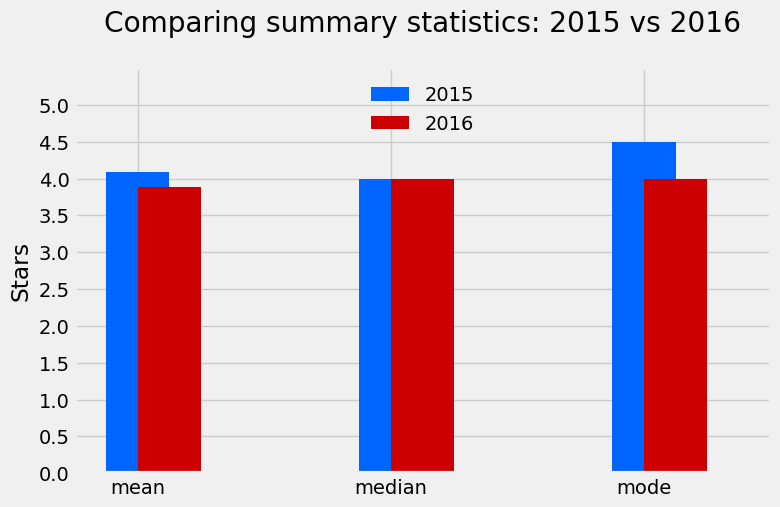

In [ ]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')

# Save figure instead of displaying it inline for memory efficiency
plt.savefig("images/15_16_centers_comparison.png", dpi=300, bbox_inches='tight')

# Clear the plot to free memory
plt.close()

<div>
<img src="/images/15_16_centers_comparison.png" width="750" height="500"/>
</div>

There is evidence to suggest that the upward bias on Fandango's movie ratings was decreased or eliminated. A way to estimate if the system was adequately changed would be to analyze the difference in actual vs. presented ratings from Hickey's 2015 analysis. Adding that to the end of this report will strengthen it. 

In [87]:
score_comparisons['Fandango_Difference'].mean()

np.float64(0.24383561643835613)

The mean difference in Fandango ratings and Fandango stars, 0.24, is similar to the mean difference in Fandango ratings in 2015 and 2016, 0.2. This would suggest that Fandango has acted to address the upward bias in its system.

<function matplotlib.pyplot.show(close=None, block=None)>

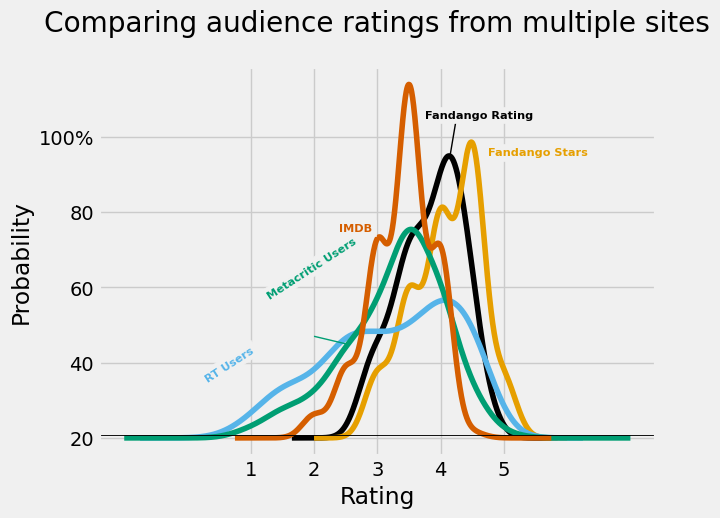

In [ ]:
pd.set_option('display.max_columns', None)
# Isolate normalized ratings
normalized_ratings = score_comparisons[['Fandango_Ratingvalue',
                                        'Fandango_Stars',
                                        'RT_user_norm_round',
                                        'Metacritic_user_norm_round',
                                        'IMDB_norm_round']]

ax1 = plt.axes()
# Create list of colorblind friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

site_graph=normalized_ratings.plot.kde(color=colors,ax=ax1,legend=False)
site_graph.set_title('Comparing audience ratings from multiple sites', y=1.07)
site_graph.set_xlabel('Rating')
site_graph.set_xticks([1,2,3,4,5])
site_graph.axhline(y=.007,c='black',linewidth=0.65)
site_graph.set_ylabel('Probability')
site_graph.set_yticklabels(labels=['0','20','40','60','80','100%'])

# Label lines on plot
site_graph.text(x=3.75,y=.85,s='Fandango Rating',color=colors[0],weight='bold', backgroundcolor='#f0f0f0',fontsize='xx-small')
x = [4.15,4.25]
y = [.75,.85]
site_graph.plot(x,y,'-k',linewidth=1,color=colors[0])

site_graph.text(x=4.75,y=.75,s='Fandango Stars',color=colors[1],weight='bold', backgroundcolor='#f0f0f0',fontsize='xx-small')

site_graph.text(x=.25,y=.15,s='RT Users',color=colors[2],weight='bold', rotation=33, backgroundcolor='#f0f0f0',fontsize='xx-small')

site_graph.text(x=1.23,y=.37,s='Metacritic Users',color=colors[3],weight='bold', rotation=33, backgroundcolor='#f0f0f0',fontsize='xx-small')
x1 = [2,2.5]
y1 = [.27,.25]
site_graph.plot(x1,y1,'-k',linewidth=1,color=colors[3])

site_graph.text(x=2.4,y=.55,s='IMDB',color=colors[4],weight='bold', backgroundcolor='#f0f0f0',fontsize='xx-small')

# Save figure instead of displaying it inline for memory efficiency
plt.savefig("images/multiple_site_comparison.png", dpi=300, bbox_inches='tight')

# Clear the plot to free memory
plt.close()

<div>
<img src="/images/multiple_site_comparison.png" width="750" height="500"/>
</div>

In [89]:
normalized_ratings.mean().sort_values()

RT_user_norm_round            3.226027
Metacritic_user_norm_round    3.270548
IMDB_norm_round               3.380137
Fandango_Ratingvalue          3.845205
Fandango_Stars                4.089041
dtype: float64

Comparing ratings across sites, Fandango still has the highest mean ratings score for movies across the websites. While the other three sites have mean ratings in a range of 0.16, Fandango mean ratings are .46 higher than the next highest website ratings, suggesting that they were still inflating ratings. 